## Setting Up The Environment

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
print("Tensorflow Version",tf.__version__)
from keras.models import load_model
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import sentencepiece
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
import warnings
warnings.filterwarnings("ignore")


from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax


from tqdm import tqdm
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch


import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



import ipywidgets as widgets
from IPython.display import display



import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
from tabulate import tabulate

import pyfiglet

[nltk_data] Downloading package stopwords to C:\Users\AKSHAY KUMAR
[nltk_data]     DHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tensorflow Version 2.13.0


## initializing all the function

In [2]:


stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

# Regular expression pattern to match mentions
mention_pattern = r'@[\w\d_]+'

# Function to remove mentions from a comment
def remove_mentions(comment):
    return re.sub(mention_pattern, '', comment)





text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)




def preprocess1(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [3]:

# Folder containing CSV files
folder_path = "D:\\internship\\data\\Instagram\\The Answer"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file, read its content, and store in the list of DataFrames
for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(csv_file_path)
    dfs.append(df)

# Concatenate the list of DataFrames into a single merged DataFrame
merged_df_insta = pd.concat(dfs, ignore_index=True)




#data cleaning



#renaming coloumns 
new_column_names = {
    '="Comment Text"': 'Comment Text',
    '="Date"': 'Date',
    '="Username"':'Username',
    '="User Id"':'User Id'
    
}
merged_df_insta.rename(columns=new_column_names, inplace=True)

selected_columns = ['User Id','Username','Comment Text','Date']
merged_df_insta=merged_df_insta[selected_columns]
#Formating the User Id,Username and Comment text coloumn 
merged_df_insta['Comment Text'] = merged_df_insta['Comment Text'].str.lstrip('="').str.rstrip('"')
merged_df_insta['User Id'] = merged_df_insta['User Id'].str.lstrip('="').str.rstrip('"')
merged_df_insta['Username'] = merged_df_insta['Username'].str.lstrip('="').str.rstrip('"')
#Formating the Data coloumn. 
merged_df_insta['Date'] = pd.to_datetime(merged_df_insta['Date'], format='="%m/%d/%Y, %I:%M:%S %p"')
merged_df_insta['Date'] = merged_df_insta['Date'].dt.strftime('%Y-%m-%d %H:%M')
 

In [4]:
merged_df_insta
desired_username= 'theanswerrock'
merged_df_insta_with_reply = merged_df_insta[merged_df_insta['Username'] == desired_username]
merged_df_insta_without_reply=merged_df_insta[merged_df_insta['Username'] != desired_username]


In [5]:
merged_df_insta_with_reply

,User Id,Username,Comment Text,Date
3,1662285722,theanswerrock,@ginger_scarff hey ya mate! I had surf trip pl...,2020-04-09 21:25
61,1662285722,theanswerrock,Damn right we' be rocking pride : ),2017-10-13 18:48
62,1662285722,theanswerrock,"@marikorock ha, it's s Z guitar : )",2017-10-13 22:16
69,1662285722,theanswerrock,@allesueber yup we have girls size : ),2017-10-25 17:31
92,1662285722,theanswerrock,"@andycolbert haha!! Yes, told ya that's how it...",2017-11-02 17:23
...,...,...,...,...
1939,1662285722,theanswerrock,@marshallamp04 love Canada!,2023-06-29 16:58
1940,1662285722,theanswerrock,@vasquito.aguirreok that would be awesome mate...,2023-06-29 16:59
1949,1662285722,theanswerrock,"@rocio_dtm awe, we have too! Madrid is one of ...",2023-06-30 20:44
1950,1662285722,theanswerrock,@darkoverdark yes please! Love Spain. Salud 🍻,2023-06-30 20:47


In [6]:
# Folder containing CSV files
folder_path = "D:\\internship\\data\\Facebook\\The Answer"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file, read its content, and store in the list of DataFrames
for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(csv_file_path)
    dfs.append(df)

# Concatenate the list of DataFrames into a single merged DataFrame
merged_df_fb = pd.concat(dfs, ignore_index=True)


# data cleaning



#renaming the coloumns 
new_column_names = {
    'Content': 'Comment Text',
    'CommentAt': 'Date',
    'UserId': 'User Id',
    'Author': 'Username'
}
merged_df_fb.rename(columns=new_column_names, inplace=True)

selected_columns = ['User Id','Username','Comment Text','Date']
merged_df_fb=merged_df_fb[selected_columns]
#Formating the  date coloumn 
merged_df_fb
merged_df_fb['Date'] = pd.to_datetime(merged_df_fb['Date'], format='%m/%d/%Y %I:%M %p')
merged_df_fb['Date'] = merged_df_fb['Date'].dt.strftime('%Y-%m-%d %H:%M')
merged_df_fb

,User Id,Username,Comment Text,Date
0,1.567192e+09,Andy Fox,And also getting a play tonight on Detroits Kr...,2022-11-05 20:39
1,5.313608e+08,Pete Hurst,Maureen Parslow,2023-02-09 22:04
2,1.000079e+14,Scott Lang,I'm so sorry about your stolen car 😞 I was a v...,2023-06-25 18:46
3,8.020823e+08,David Black,Let’s hope the thieves stupidity catches up wi...,2023-03-02 13:45
4,1.000098e+14,Steve Rolick,what a bunch of low lifes KARMA will visit you,2023-03-02 01:16
...,...,...,...,...
5239,1.000418e+14,James Craig,Cough cough drc 😜😜😜😜,2023-04-24 12:17
5240,6.471025e+08,Röd Walker,Hey guys why are your first two albums Rise an...,2023-04-24 11:10
5241,1.000797e+14,Linda James,NaN,2023-04-24 19:00
5242,1.009204e+09,Nick South Knighton,The band were on fire in Birmingham ……not that...,2023-04-24 15:52


In [7]:
merged_df_fb
desired_username_fb= 'The Answer'
merged_df_fb_with_reply = merged_df_fb[merged_df_fb['Username'] == desired_username_fb]
merged_df_fb_without_reply=merged_df_fb[merged_df_fb['Username'] != desired_username_fb]


In [8]:
merged_df = pd.concat([merged_df_insta, merged_df_fb], ignore_index=True)
merged_df = merged_df.sort_values(by='Date')
merged_df


,User Id,Username,Comment Text,Date
311,2126133198,rowenadavies,Awesome! -do they still put worms in Tequila?,2017-02-05 16:58
312,2234145913,l.a.soto,"Please guys come to Guadalajara, you are so c...",2017-02-05 17:09
320,3525818713,vakilandophotos,Have fun. Hope to see toy again soon! 🎸,2017-02-05 21:46
321,205898834,sunflower210,Cheers!! ✌🏻,2017-02-05 23:07
313,205898834,sunflower210,Salad!! ✌🏻,2017-02-05 23:09
...,...,...,...,...
2269,618199474.0,Ian Blud,Baked beans n pyros don't mix. Looking fwd to ...,2023-07-11 12:47
2271,1750710029.0,Paul Alan Turiccki,Dont light your farts,2023-07-11 19:42
2268,100006784548943.0,Lisa McNamara,Wish you were in America,2023-07-12 01:28
2270,1459434942.0,Gareth Baker,Last time you were up the mountain was rocking...,2023-07-13 10:27


In [9]:
merged_df['Comment Text'] = merged_df['Comment Text'].astype(str)
# # Name of the column containing comment text
# comment_column = 'Comment Text'

# Apply the function to the comment column
merged_df['Comment Text'] = merged_df['Comment Text'].apply(remove_mentions)
df=merged_df
df

,User Id,Username,Comment Text,Date
311,2126133198,rowenadavies,Awesome! -do they still put worms in Tequila?,2017-02-05 16:58
312,2234145913,l.a.soto,"Please guys come to Guadalajara, you are so c...",2017-02-05 17:09
320,3525818713,vakilandophotos,Have fun. Hope to see toy again soon! 🎸,2017-02-05 21:46
321,205898834,sunflower210,Cheers!! ✌🏻,2017-02-05 23:07
313,205898834,sunflower210,Salad!! ✌🏻,2017-02-05 23:09
...,...,...,...,...
2269,618199474.0,Ian Blud,Baked beans n pyros don't mix. Looking fwd to ...,2023-07-11 12:47
2271,1750710029.0,Paul Alan Turiccki,Dont light your farts,2023-07-11 19:42
2268,100006784548943.0,Lisa McNamara,Wish you were in America,2023-07-12 01:28
2270,1459434942.0,Gareth Baker,Last time you were up the mountain was rocking...,2023-07-13 10:27


## vader approach on the aggreated dataset (insta and fb)

In [9]:
Sentiment = SentimentIntensityAnalyzer()
sentiment_scores_V = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row[2]  
    sentiment_score = Sentiment.polarity_scores(text)
    sentiment_scores_V.append(sentiment_score)

# Create a new DataFrame to store sentiment scores and merge it with the original data
sentiment_df = pd.DataFrame(sentiment_scores_V)
new_column_names = {
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound',
}
sentiment_df.rename(columns=new_column_names, inplace=True)
data_with_sentiment_VADER  = pd.concat([df, sentiment_df], axis=1)


data_with_sentiment_VADER.isnull().sum()
# print()
data_with_sentiment_VADER=data_with_sentiment_VADER.dropna()

data_with_sentiment_VADER.isnull().sum()
data_with_sentiment_VADER

  0%|          | 0/7207 [00:00<?, ?it/s]

100%|██████████| 7207/7207 [00:00<00:00, 7513.29it/s]


,User Id,Username,Comment Text,Date,vader_neg,vader_neu,vader_pos,vader_compound
311,2126133198,rowenadavies,Awesome! -do they still put worms in Tequila?,2017-02-05 16:58,0.000,0.562,0.438,0.7906
312,2234145913,l.a.soto,"Please guys come to Guadalajara, you are so c...",2017-02-05 17:09,0.000,1.000,0.000,0.0000
320,3525818713,vakilandophotos,Have fun. Hope to see toy again soon! 🎸,2017-02-05 21:46,0.000,1.000,0.000,0.0000
321,205898834,sunflower210,Cheers!! ✌🏻,2017-02-05 23:07,0.000,0.000,1.000,0.3400
313,205898834,sunflower210,Salad!! ✌🏻,2017-02-05 23:09,0.243,0.339,0.417,0.4724
...,...,...,...,...,...,...,...,...
2269,618199474.0,Ian Blud,Baked beans n pyros don't mix. Looking fwd to ...,2023-07-11 12:47,0.000,0.901,0.099,0.4738
2271,1750710029.0,Paul Alan Turiccki,Dont light your farts,2023-07-11 19:42,0.000,0.000,0.000,0.0000
2268,100006784548943.0,Lisa McNamara,Wish you were in America,2023-07-12 01:28,0.000,1.000,0.000,0.0000
2270,1459434942.0,Gareth Baker,Last time you were up the mountain was rocking...,2023-07-13 10:27,0.055,0.804,0.141,0.4019


## custome model approach fr analysis 

### load the model

In [10]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path = "C:\\Users\\AKSHAY KUMAR DHAR\\OneDrive - Queen's University Belfast\\model\\save model\\my_model.h5"
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           87172500  
                                                                 
 spatial_dropout1d (Spatial  (None, 30, 300)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            96064     
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               66048 

In [11]:
df

,User Id,Username,Comment Text,Date
311,2126133198,rowenadavies,Awesome! -do they still put worms in Tequila?,2017-02-05 16:58
312,2234145913,l.a.soto,"Please guys come to Guadalajara, you are so c...",2017-02-05 17:09
320,3525818713,vakilandophotos,Have fun. Hope to see toy again soon! 🎸,2017-02-05 21:46
321,205898834,sunflower210,Cheers!! ✌🏻,2017-02-05 23:07
313,205898834,sunflower210,Salad!! ✌🏻,2017-02-05 23:09
...,...,...,...,...
2269,618199474.0,Ian Blud,Baked beans n pyros don't mix. Looking fwd to ...,2023-07-11 12:47
2271,1750710029.0,Paul Alan Turiccki,Dont light your farts,2023-07-11 19:42
2268,100006784548943.0,Lisa McNamara,Wish you were in America,2023-07-12 01:28
2270,1459434942.0,Gareth Baker,Last time you were up the mountain was rocking...,2023-07-13 10:27


In [12]:
train_data=df['Comment Text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

train_data=df['Comment Text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

commentdata = df
unseen_texts = commentdata['Comment Text'].tolist()
unseen_texts
unseen_texts = commentdata['Comment Text'].apply(lambda x: str(x)).tolist()
unseen_texts


unseen_processed = []
for text in unseen_texts:
  text  = preprocess(text)
  unseen_processed.append(text)
unseen_processed
sequences = tokenizer.texts_to_sequences(unseen_processed)
max_sequence_length =30  # Adjust this based on your training sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length) 

predictions_senti = pretrained_lstm_model.predict(padded_sequences)
predictions_senti

def decode_sentiment(score):
    return "Positive" if score >0.4 else "Negative"

y_pred = [decode_sentiment(predictions_senti) for predictions_senti in predictions_senti]
y_pred


print(np.unique(y_pred)) 
print('-------------------------------------------------------------------------')
print(np.unique(predictions_senti)) 


print(y_pred)
print(unseen_processed)
df_y_pred = pd.DataFrame({'Sentiment': y_pred})
df_unseen_texts = pd.DataFrame({'Text': unseen_processed})

result_df = pd.concat([df_unseen_texts, df_y_pred], axis=1)

result_df

Vocabulary Size : 6898
Vocabulary Size : 6898
226/226 [==============================] - 2s 5ms/step
['Negative' 'Positive']
-------------------------------------------------------------------------
[0.0030256  0.00499352 0.00572084 ... 0.99372077 0.99388057 0.9971153 ]
['Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negativ

,Text,Sentiment
0,awesome still put worms tequila,Negative
1,please guys come guadalajara close wanna see hear,Negative
2,fun hope see toy soon,Positive
3,cheers,Positive
4,salad,Positive
...,...,...
7202,baked beans n pyros mix looking fwd seeing guy...,Positive
7203,dont light farts,Positive
7204,wish america,Negative
7205,last time mountain rocking also responsible be...,Negative


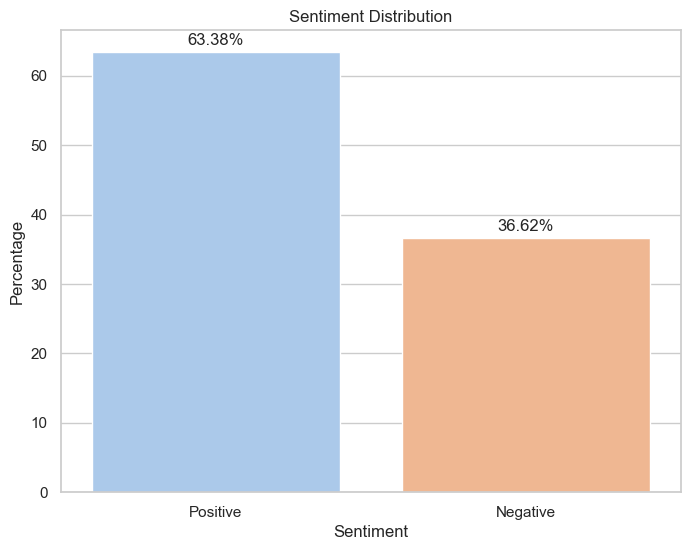

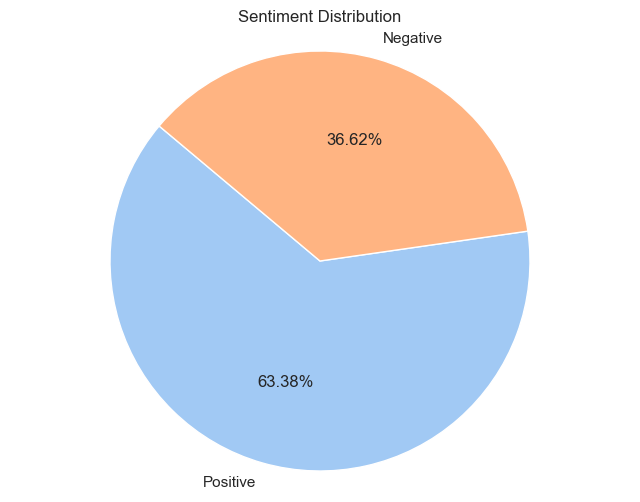

In [13]:
# some visulazization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = result_df['Sentiment'].value_counts()
sentiment_counts


#Calculate the percentage of each sentiment
total_samples = len(result_df)
sentiment_percentages = (sentiment_counts / total_samples) * 100


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')

# Display percentages on the bars
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

#----------------------------------------------------------------------------------------------------

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

In [14]:
x=result_df[result_df['Sentiment']=='Negative']
x.head(500)

,Text,Sentiment
0,awesome still put worms tequila,Negative
1,please guys come guadalajara close wanna see hear,Negative
5,cormo rockin matt forte jersey,Negative
6,come hawaii aloha,Negative
11,damn jump plane bee,Negative
...,...,...
1369,happy birthday great night glasgow hopefully n...,Negative
1371,happy birthday paul mahon,Negative
1373,happy birthday paul good one x,Negative
1374,happy birthday,Negative


## roberto approach on the aggreated dataset (insta and fb)

In [15]:
torch.backends.cudnn.benchmark = False
MODEL1 = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer1 = AutoTokenizer.from_pretrained(MODEL1)
config1 = AutoConfig.from_pretrained(MODEL1)
model1 = AutoModelForSequenceClassification.from_pretrained(MODEL1)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax

# Define the sentiment labels
sentiment_labels = ['roberta_neg', 'roberta_neu', 'roberta_pos']

# Initialize an empty list to store the sentiment dictionaries
sentiment_scores_list = []

# Iterate through each text in the 'Comment Text' column
# Iterate through each text in the 'Comment Text' column
for text in tqdm(df['Comment Text'], total=len(df)):
    if isinstance(text, str):  # Check if the value is a string
        try:
            text = preprocess1(text)
            text = preprocess(text)
            encoded_text = tokenizer1(text, return_tensors='pt')
            output = model1(**encoded_text)
            scores = output[0][0].detach().numpy()  # Applying softmax
            scores = softmax(scores)
            scores_dict = {label: score for label, score in zip(sentiment_labels, scores)}
            sentiment_scores_list.append(scores_dict)
        except RuntimeError:
            print(f'Broke for text: {text}')
    else:
        print(f'Skipped non-string value: {text}')
# Convert the list of sentiment dictionaries to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores_list)

# Concatenate the original DataFrame with the sentiment scores DataFrame
data_with_sentiment_ROBERTA = pd.concat([df, sentiment_scores_df], axis=1)

data_with_sentiment_ROBERTA

100%|██████████| 7207/7207 [29:50<00:00,  4.02it/s] 


,User Id,Username,Comment Text,Date,roberta_neg,roberta_neu,roberta_pos
311,2126133198,rowenadavies,Awesome! -do they still put worms in Tequila?,2017-02-05 16:58,0.003544,0.030866,0.965589
312,2234145913,l.a.soto,"Please guys come to Guadalajara, you are so c...",2017-02-05 17:09,0.003655,0.182648,0.813697
320,3525818713,vakilandophotos,Have fun. Hope to see toy again soon! 🎸,2017-02-05 21:46,0.021105,0.152174,0.826721
321,205898834,sunflower210,Cheers!! ✌🏻,2017-02-05 23:07,0.013052,0.291348,0.695600
313,205898834,sunflower210,Salad!! ✌🏻,2017-02-05 23:09,0.003667,0.094684,0.901649
...,...,...,...,...,...,...,...
2269,618199474.0,Ian Blud,Baked beans n pyros don't mix. Looking fwd to ...,2023-07-11 12:47,0.024693,0.230310,0.744997
2271,1750710029.0,Paul Alan Turiccki,Dont light your farts,2023-07-11 19:42,0.225575,0.373126,0.401299
2268,100006784548943.0,Lisa McNamara,Wish you were in America,2023-07-12 01:28,0.045334,0.807523,0.147143
2270,1459434942.0,Gareth Baker,Last time you were up the mountain was rocking...,2023-07-13 10:27,0.383904,0.572443,0.043653


## visulization and coustome function to determine lables and bit of data ceaning ( on the aggreated dataset (insta and fb))

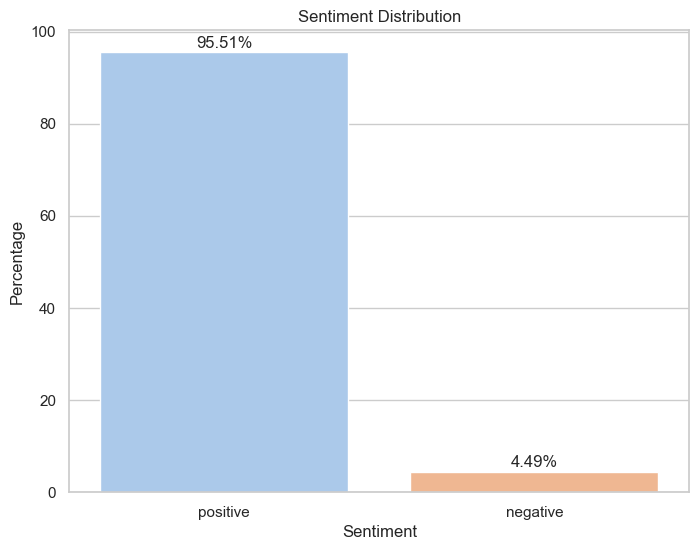

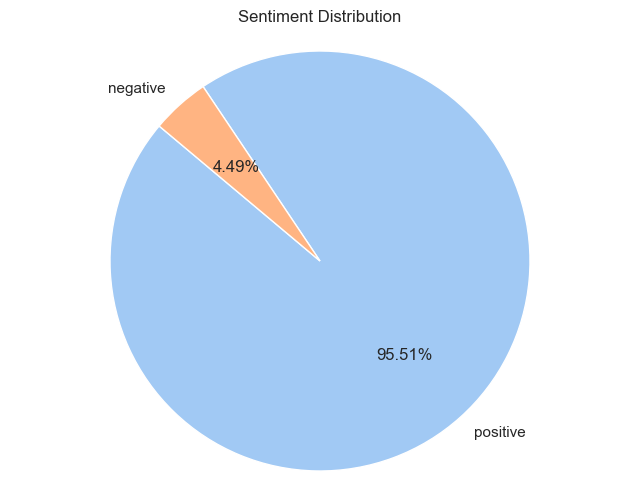

In [17]:
data_with_sentiment_ROBERTA
data_with_sentiment_ROBERTA.isnull().sum()
print()
data_with_sentiment_ROBERTA=data_with_sentiment_ROBERTA.dropna()

data_with_sentiment_ROBERTA.isnull().sum()
data_with_sentiment_ROBERTA








# Custom function to determine sentiment label
def get_sentiment(row):
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
    if max_score == row['roberta_neg']:
        return 'negative'
    elif max_score == row['roberta_neu']:
        return 'positive'
    else:
        return 'positive'

# Apply the custom function to create the 'sentiment' column
data_with_sentiment_ROBERTA['sentiment'] = data_with_sentiment_ROBERTA.apply(get_sentiment, axis=1)
selected_columns = ['User Id', 'Username', 'Comment Text', 'Date','sentiment']
sentiment = data_with_sentiment_ROBERTA[selected_columns]
sentiment



# visulization
# some visulazization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = sentiment['sentiment'].value_counts()
sentiment_counts


#Calculate the percentage of each sentiment
total_samples = len(sentiment)
sentiment_percentages = (sentiment_counts / total_samples) * 100


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')

# Display percentages on the bars
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

#----------------------------------------------------------------------------------------------------

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


## time series visulization on the aggreated data 

In [18]:
data_with_sentiment_ROBERTA.set_index('Date', inplace=True)
data_with_sentiment_ROBERTA.index = pd.to_datetime(data_with_sentiment_ROBERTA.index)


In [19]:




time_plot = data_with_sentiment_ROBERTA[['roberta_pos', 'roberta_neg']]  # Selecting both columns

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=time_plot.index.min().date(),
        end_date=time_plot.index.max().date()
    ),
    dcc.Graph(id='time-plot'),
])

@app.callback(
    Output('time-plot', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_time_plot(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    filtered_time_plot = time_plot[(time_plot.index >= start_date) & (time_plot.index <= end_date)]

    fig = px.line(filtered_time_plot, title="Zoomable Time Plot")
    fig.update_xaxes(title_text="Time")
    fig.update_yaxes(title_text="Value")  # Update the y-axis label

    fig.update_layout(
        xaxis_rangeslider_visible=True,
        xaxis_rangeslider_thickness=0.1,
        xaxis_type="date"
    )

    for column in filtered_time_plot.columns:
        fig.add_scatter(x=filtered_time_plot.index, y=filtered_time_plot[column], mode='lines+markers', name=column)

    fig.update_xaxes(rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
        rangeslider=dict(visible=True),
        type="date"
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
    


## emotion classification 

In [20]:
MODEL = f"SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
comments = sentiment.iloc[:,2].tolist()
emotion_mapping = {
    0: "admiration",
    1: "amusement",
    2: "anger",
    3: "annoyance",
    4: "approval",
    5: "caring",
    6: "confusion",
    7: "curiosity",
    8: "desire",
    9: "disappointment",
    10: "disapproval",
    11: "disgust",
    12: "embarrassment",
    13: "excitement",
    14: "fear",
    15: "gratitude",
    16: "grief",
    17: "joy",
    18: "love",
    19: "nervousness",
    20: "optimism",
    21: "pride",
    22: "realization",
    23: "relief",
    24: "remorse",
    25: "sadness",
    26: "surprise",
    27: "neutral"
}


from tqdm import tqdm

# Create a list to store the emotion predictions
emotion_predictions = []

# Iterate through the comments and classify emotions
for comment in tqdm(comments, desc="Classifying emotions"):
    inputs = tokenizer(comment, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    predicted_emotion = torch.argmax(outputs.logits).item()
    emotion_name = emotion_mapping[predicted_emotion]
    emotion_predictions.append(emotion_name)

# Add the predicted emotion names to the DataFrame
sentiment["predicted_emotion"] = emotion_predictions

 

Classifying emotions: 100%|██████████| 7195/7195 [7:14:47<00:00,  3.63s/it]  


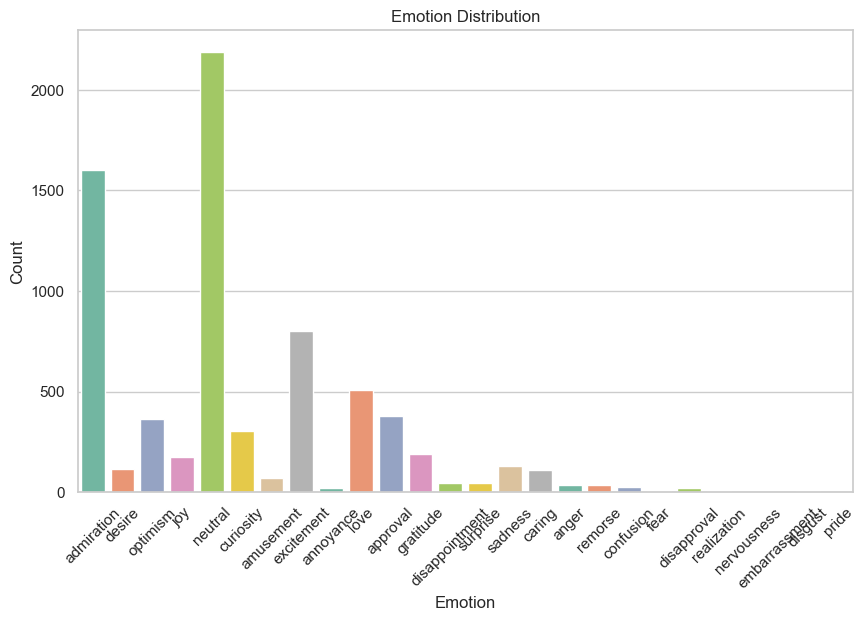

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'emotion' column
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment, x='predicted_emotion', palette='Set2')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


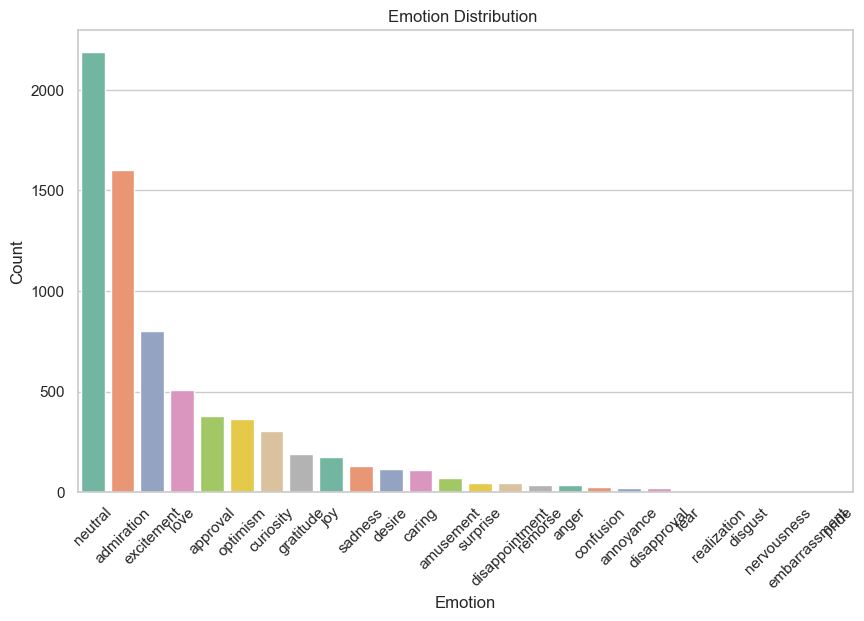

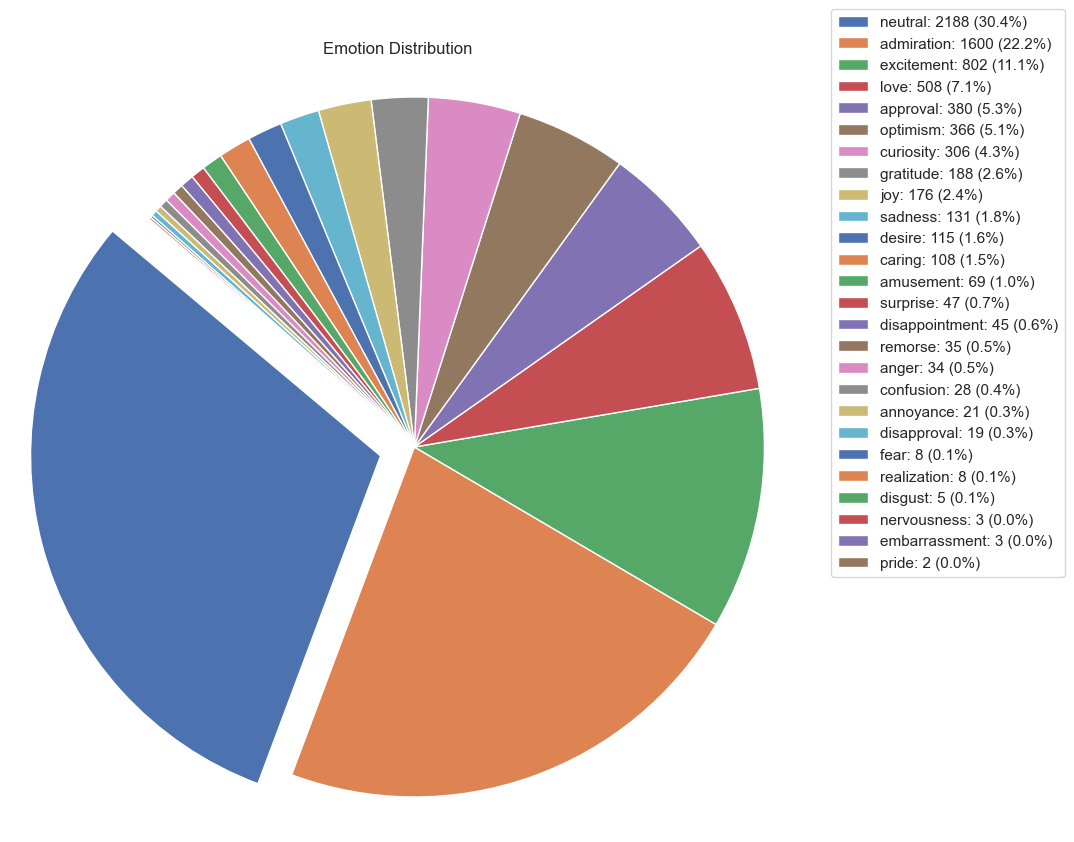

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

emotion_counts = sentiment['predicted_emotion'].value_counts().reset_index()
emotion_counts.columns = ['predicted_emotion', 'count']
sorted_emotion_counts = emotion_counts.sort_values(by='count',ascending=False)

# Create the countplot with sorted order
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment, x='predicted_emotion', palette='Set2', order=sorted_emotion_counts['predicted_emotion'])
plt.title("Emotion Distribution ")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



import matplotlib.pyplot as plt
import numpy as np


emotions_data = sentiment['predicted_emotion']

# Get emotion counts
emotions = emotions_data.value_counts()
emotions = emotions[emotions >= 1]  # Filter out emotions with zero counts

# Explode the first slice (optional)
explode = (0.1,) + (0,) * (len(emotions) - 1)

# Create a pie chart without labels
plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(emotions, labels=None, autopct='', startangle=140, explode=explode, pctdistance=0.85)

# Calculate the positions for the legend
bbox = (1.05, 0.7)
legend_labels = [f"{emotion}: {count} ({percent:.1f}%)"
                 for emotion, count, percent in zip(emotions.index, emotions, 100.0 * emotions / emotions.sum())]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=bbox)

# Set title
plt.title("Emotion Distribution")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add colors next to the pie chart
colors = [w.get_facecolor() for w in wedges]
for at, color in zip(autotexts, colors):
    at.set_text('')  # Remove text from slices
    at.set_color(color)

# Show the pie chart
plt.show()



## Grouping of the comments 

In [10]:
sentiment
grouped = sentiment.groupby('User Id')['Comment Text'].agg(list).reset_index()        
grouped['num_comments'] = grouped['Comment Text'].apply(len)
print(grouped)

# Iterate through each row of the DataFrame
for index, row in grouped.iterrows():
    user_id = row['User Id']
    comments = row['Comment Text']
    print(f"User ID: {user_id}")
    for comment in comments:
        print(comment)
    print("--------" * 30)  # Adding a separator between users



grouped = grouped.sort_values(by='num_comments', ascending=False)
grouped
grouped['num_comments'].unique()

          User Id                                       Comment Text  \
0      42206035.0  [10AM in what time zone?, Bought the 2 colored...   
1     193200941.0                                  [Rebecca Bellamy]   
2     284000323.0  [Yes! I was listening back to some of your stu...   
3     284003391.0  [Holy shit. I haven't heard from you guys sinc...   
4     500375629.0       [Brilliant Tribute Rip George  & Malcolm. ❤]   
...           ...                                                ...   
2916   9501401714                                               [❤️]   
2917   9534857807                                [Can’t wait 👏, 🤤🤤🤤]   
2918      9556597                  [Thnx guys for a great afternoon]   
2919   9605578192                                [Send Pic On .Life]   
2920    983165092  [Love em, and they have never been away in my ...   

      num_comments  
0                2  
1                1  
2                1  
3                1  
4                1  
...      

array([154,  78,  60,  59,  41,  34,  32,  31,  28,  26,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [11]:
df =grouped
min_comments = df['num_comments'].min()
max_comments = df['num_comments'].max()
# Function to normalize comments to the 1-100 range
def normalize_comments(num_comments):
    return ((num_comments - min_comments) / (max_comments - min_comments)) * 99 + 1

# Apply the normalization function to the DataFrame
df['Normalized_Comments_count'] = df['num_comments'].apply(normalize_comments)

# Display the normalized data
df

,User Id,Comment Text,num_comments,Normalized_Comments_count
2371,1662285722,"[Ha, I know bating it on! Will pack sun factor...",154,100.000000
2857,6337360310,[😎love it..hoping for another chance to see yo...,78,50.823529
1944,100006784548943.0,[Why isn't the Answer coming back to America. ...,60,39.176471
1262,100000155336251.0,"[The Blues… Your singing my song!! 👍🎶💙💙, I Thi...",59,38.529412
1511,100001084546031.0,"[See ya there !!, Clicked the link but it says...",41,26.882353
...,...,...,...,...
1182,1725976437.0,[Hi from Seville],1,1.000000
1181,1715541563.0,[Tear it up James 🤘🏻],1,1.000000
1179,1700334280.0,[Yous were unreal on thon tour],1,1.000000
1178,1696248344.0,[All the very best & I'm looking forward to th...,1,1.000000


In [12]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with 'userid' and 'Normalized_Comments' columns
X = df[['Normalized_Comments_count']]

# Define the number of clusters (K)
n_clusters = 3

# Create a K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=56)

# Fit the model to your data
df['Cluster'] = kmeans.fit_predict(X)

# Map cluster labels to meaningful segment names
cluster_mapping = {
    0: 'Low Contributor- Ambient',
    1: 'High Contributor-Super ',
    2: ' Moderate Contributor - Engaged'
}
df['Contribution_Category'] = df['Cluster'].map(cluster_mapping)

# Display the segmented data
df


,User Id,Comment Text,num_comments,Normalized_Comments_count,Cluster,Contribution_Category
2371,1662285722,"[Ha, I know bating it on! Will pack sun factor...",154,100.000000,1,High Contributor-Super
2857,6337360310,[😎love it..hoping for another chance to see yo...,78,50.823529,1,High Contributor-Super
1944,100006784548943.0,[Why isn't the Answer coming back to America. ...,60,39.176471,1,High Contributor-Super
1262,100000155336251.0,"[The Blues… Your singing my song!! 👍🎶💙💙, I Thi...",59,38.529412,1,High Contributor-Super
1511,100001084546031.0,"[See ya there !!, Clicked the link but it says...",41,26.882353,2,Moderate Contributor - Engaged
...,...,...,...,...,...,...
1182,1725976437.0,[Hi from Seville],1,1.000000,0,Low Contributor- Ambient
1181,1715541563.0,[Tear it up James 🤘🏻],1,1.000000,0,Low Contributor- Ambient
1179,1700334280.0,[Yous were unreal on thon tour],1,1.000000,0,Low Contributor- Ambient
1178,1696248344.0,[All the very best & I'm looking forward to th...,1,1.000000,0,Low Contributor- Ambient


In [13]:
df['Contribution_Category'].value_counts()

Contribution_Category
Low Contributor- Ambient           2656
 Moderate Contributor - Engaged     261
High Contributor-Super                4
Name: count, dtype: int64

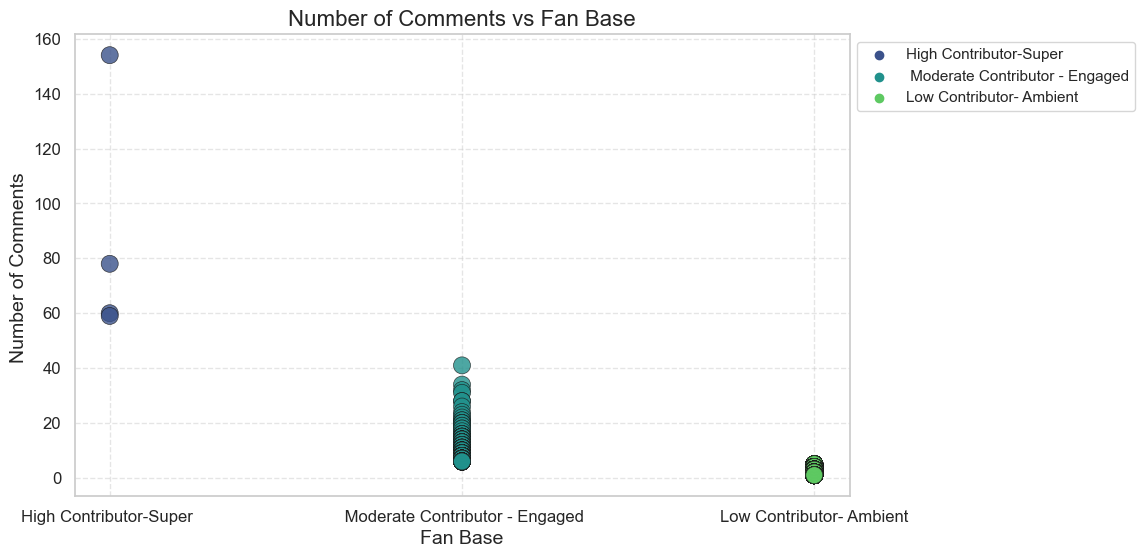

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a scatter plot with customizations
plt.figure(figsize=(10, 6))

# Use Seaborn's scatterplot to assign colors based on 'Contribution_Category'
scatter = sns.scatterplot(x='Contribution_Category', y='num_comments', hue='Contribution_Category', data=df, palette='viridis', s=150, alpha=0.8, edgecolor='k', linewidth=0.5, marker='o')

plt.xlabel('Fan Base', fontsize=14)
plt.ylabel('Number of Comments ', fontsize=14)
plt.title('Number of Comments vs Fan Base', fontsize=16)

# Add a grid (optional)
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick labels (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend outside of the plot
legend = plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize(12)  # Adjust the legend title fontsize

# Increase the vibrancy of the colors




plt.show()


In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown widget to select user IDs
user_dropdown = widgets.Dropdown(options=["Select User ID"] + list(grouped['User Id']), description='User ID:')


# user_container = widgets.HBox([user_dropdown, user_search])

# Create a search bar widget to search for user IDs
user_search = widgets.Text(placeholder='Search User ID', description='Search:')
search_output = widgets.Output()

# Create a range slider widget to select the comment count range
comment_count_range = widgets.IntRangeSlider(
    value=(1, 50),
    min=1,
    max=1000,
    step=50,
    continuous_update=False
)

# Create an output widget to display the selected user's comments
output = widgets.Output()

# Create a button widget to clear all widgets
clear_button = widgets.Button(description='Clear')



user_container = widgets.HBox([user_dropdown, user_search])
# Function to display comments for a selected user
def display_comments(selected_user):
    with output:
        clear_output(wait=True)
        if selected_user == "Select User ID":
            print("Please select or search for a user ID")
        else:
            selected_comments = grouped[grouped['User Id'] == selected_user]['Comment Text'].iloc[0]
            print(f"User ID: {selected_user}")
            print(f"Number of Comments: {len(selected_comments)}")
            print("\nComments:")
            for comment in selected_comments:
                print(comment)

# Function to handle search bar changes
def on_search_change(change):
    search_term = change['new']
    
    if search_term == "":
        matching_users = grouped
    else:
        matching_users = grouped[grouped['User Id'].astype(str).str.contains(search_term, case=False, na=False)]
    
    with search_output:
        clear_output(wait=True)
        for _, user_row in matching_users.iterrows():
            user_id = user_row['User Id']
            comments = user_row['Comment Text']
            
            print(f"User ID: {user_id}")
            print(f"Number of Comments: {len(comments)}")
            print("Comments:")
            for comment in comments:
                print(comment)
            print("-" * 20)

# Function to handle user selection changes
def on_user_selection(change):
    selected_user = change['new']
    display_comments(selected_user)

# Function to handle comment count range changes
def on_comment_count_change(change):
    min_count, max_count = change['new']
    filtered_users = grouped[(grouped['num_comments'] >= min_count) & (grouped['num_comments'] <= max_count)]
    with output:
        clear_output(wait=True)
        for index, row in filtered_users.iterrows():
            print(f"User ID: {row['User Id']}")
            print(f"Number of Comments: {row['num_comments']}")
            print("-" * 20)

# Function to clear all widgets
def clear_all_widgets(_):
    user_dropdown.value = "Select User ID"
    user_search.value = ""
    with search_output:
        clear_output(wait=True)
    comment_count_range.value = (1, 50)
    with output:
        clear_output(wait=True)

        
        
comment_count_vbox = widgets.VBox([
    widgets.Label('Comment Count Range:'),  # Description label
    comment_count_range  # The slider widget
])


# Assign widget event handlers
user_search.observe(on_search_change, names='value')
user_dropdown.observe(on_user_selection, names='value')
comment_count_range.observe(on_comment_count_change, names='value')
clear_button.on_click(clear_all_widgets)

# Display the widgets and clear button
display(user_container)
# display(user_dropdown)
# display(user_search)
# display(search_output)
# display(comment_count_range)
display(comment_count_vbox)
display(search_output)
display(output)

display(clear_button)  # Display the clear button
# display(comment_count_range)
# display(output)
# final 


Output()

Output()

Button(description='Clear', style=ButtonStyle())

## figureing  out the topic moddeling without the artist replies 

In [22]:
# outer_merged = pd.concate(merged_df_insta_without_reply, merged_df_fb_without_reply)

concatenated_df = pd.concat([merged_df_insta_without_reply, merged_df_fb_without_reply])


text_list = concatenated_df['Comment Text'].tolist()
text_list = concatenated_df['Comment Text'].apply(lambda x: str(x)).tolist()

text_list



['Hope all is well fellas. Miss you guys. Stay safe',
 'You will do that again..and everyone will love it even more🤘',
 'A celebratory tour ... that would be fabulous.. hope you guys are safe and well',
 '🔥🔥🔥🍻🍻🤘',
 '❤️❤️❤️',
 '@theanswerrock the waves will be here dude ... let me know when you finally get here mike and I’ll get the first round .. I hope yer all safe and well',
 'Miss you guys! Hope to see you soon 😊',
 'You guys are the best!!',
 'Raise a little hell Is on my top 5 favorite albums of all time ❤️❤️',
 'Miss you guys!!!',
 '@sabbathhex72 announce UK tour as soon as this is all over!',
 '🙏',
 'I was at that show!!!',
 'Aaawww 😍😍 I miss those times ... I miss you guys! Hope to see you again!',
 'Solerno! 🤣👏',
 '@bmarshall73 didn’t know u liked the Answer Brian!! ;) they’re great!!! Great live show! AB & the answer should tour together',
 'You guys are certainly helping me through it @theanswerrock Jeeeeeez I hope you do some shows after this chaos! Stay safe boys',
 'Going

In [23]:
concatenated_df
concatenated_df.to_csv('data.csv', index=False)

In [24]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Sample documents (replace with your own data)
documents = text_list

# Preprocess the documents
def preprocess(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

processed_documents = [preprocess(doc) for doc in documents]

# Create a dictionary from the preprocessed documents
dictionary = corpora.Dictionary(processed_documents)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_documents]

# Create an LDA model
num_topics =  10 # Specify the number of topics
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and associated words
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic #{topic_num + 1}: {topic_words}")

# Get the topic distribution for each document
for i, doc in enumerate(doc_term_matrix):
    print(f"Document {i + 1} - Topic Distribution: {lda_model.get_document_topics(doc)}")





import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Your code for preprocessing, creating LDA model, etc. (same as before)

# Visualize the LDA model
pyLDAvis.enable_notebook()  # If using Jupyter Notebook

# Create a visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)



Topic #1: 0.056*"yes" + 0.044*"cormac" + 0.024*"ordered" + 0.024*"yeah" + 0.023*"hell" + 0.018*"miss" + 0.016*"let" + 0.014*"pre" + 0.014*"absolutely" + 0.014*"old"
Topic #2: 0.070*"awesome" + 0.035*"lads" + 0.032*"got" + 0.020*"guys" + 0.017*"like" + 0.016*"cd" + 0.014*"need" + 0.014*"long" + 0.013*"glasgow" + 0.013*"bring"
Topic #3: 0.030*"congratulations" + 0.026*"saw" + 0.021*"dc" + 0.020*"ac" + 0.018*"tour" + 0.014*"theanswerrock" + 0.013*"uk" + 0.011*"wow" + 0.010*"fan" + 0.010*"dublin"
Topic #4: 0.073*"happy" + 0.073*"love" + 0.033*"boys" + 0.032*"birthday" + 0.028*"paul" + 0.026*"day" + 0.021*"st" + 0.017*"ya" + 0.016*"come" + 0.014*"guys"
Topic #5: 0.048*"looking" + 0.044*"forward" + 0.041*"album" + 0.040*"good" + 0.033*"guys" + 0.031*"rock" + 0.024*"deserved" + 0.023*"new" + 0.023*"seeing" + 0.021*"luck"
Topic #6: 0.066*"nan" + 0.039*"news" + 0.015*"return" + 0.014*"australia" + 0.013*"getting" + 0.011*"look" + 0.010*"band" + 0.010*"chance" + 0.010*"hoping" + 0.009*"solo"
Top